# MINI EDX RESEARCH PROJECT 

## What are *good* movies without books?



This notebook uses
data from the MovieLens website. Im going to explore this dataset mostly using pandas and matplotlib

* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/
 


# **INFO?** :
I'd like to explore the effect the book industry has on the movie industry, some questions id like to answer include: what % of top movies overall are based on books? in each genre, what % of top rated movies are based on books? whats the average rating of movies based on books?

*The first step is to import necessary libraries and explore the data to know whats in the folders and clean up the data.*


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Using pandas to read the csv file 
Movies = pd.read_csv('./movielens/movies.csv', sep =',')        
print (type(Movies))
Movies.head()                                                   #shows top 5 entrys in the dataframe 

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
Ratings = pd.read_csv('./movielens/ratings.csv', sep = ',') #Sheet with data on ratings, corresponds with Movies on Movie ID
Ratings.head(10)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
5,1,112,3.5,1094785740
6,1,151,4.0,1094785734
7,1,223,4.0,1112485573
8,1,253,4.0,1112484940
9,1,260,4.0,1112484826


In [5]:
Tags = pd.read_csv('./movielens/tags.csv', sep = ',')#Tags which include descriptions of the movie, based on a book is a tag
Tags.head(10)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
5,65,668,bollywood,1368149876
6,65,898,screwball comedy,1368150160
7,65,1248,noir thriller,1368149983
8,65,1391,mars,1368150055
9,65,1617,neo-noir,1368150217


**HOW MANY ENTRIES ARE IN ALL 3?**

In [6]:
print ('Movies ' + str(len(Movies)),
       'Ratings ' + str(len(Ratings)),
       'Tags ' + str(len(Tags))
      )

Movies 27278 Ratings 20000263 Tags 465564


**HOW CLEAN IS THE DATA? ARE THERE ANY MISSING VALUES?**

In [7]:
#Checking for Null/missing values
Movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [8]:
Ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [9]:
Tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [10]:
Tags = Tags.dropna()  #Pandas function to drop null rows

In [11]:
Tags.isnull().any()   #all clear

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

**CHECKING DESCRIPTIVE STATISTICS TO SEE IF RATING NUMBERS MAKE SENSE**

The range is supposed to be between 0 to 5 stars

In [12]:
#Only interested in the ratings column 
Ratings['rating'].describe() #Returns information on the data in the 'rating' column in the 'Ratings' data frame

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [13]:
#Checking min and max values in the data 

print (Ratings['rating'].min())
print (Ratings['rating'].max())

0.5
5.0


**Based on these stats, the min is 0.5, max is 5, mean is about 3.5 and the standard deviations looks normal ~ 1.05 from the mean** 

Exploration continues :)

In [14]:
del Tags['timestamp'], Tags['userId']  #Removing information i dont need
Tags.head()


,movieId,tag
0,4141,Mark Waters
1,208,dark hero
2,353,dark hero
3,521,noir thriller
4,592,dark hero


In [15]:
#Tagsgroup = Tags[['movieId','tag']] .groupby('movieId')
#type(Tagsgroup)
#Tagsgroup.head()

In [16]:
del Ratings['timestamp']

In [17]:
Ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [18]:
tag_counts = Tags['tag'].value_counts() # top 50 tags 
tag_counts[:20]

sci-fi                3384
based on a book       3281
atmospheric           2917
comedy                2779
action                2657
surreal               2427
BD-R                  2334
twist ending          2323
funny                 2072
dystopia              1991
stylized              1941
quirky                1906
dark comedy           1899
classic               1769
psychology            1754
fantasy               1703
time travel           1549
romance               1534
visually appealing    1509
disturbing            1487
Name: tag, dtype: int64

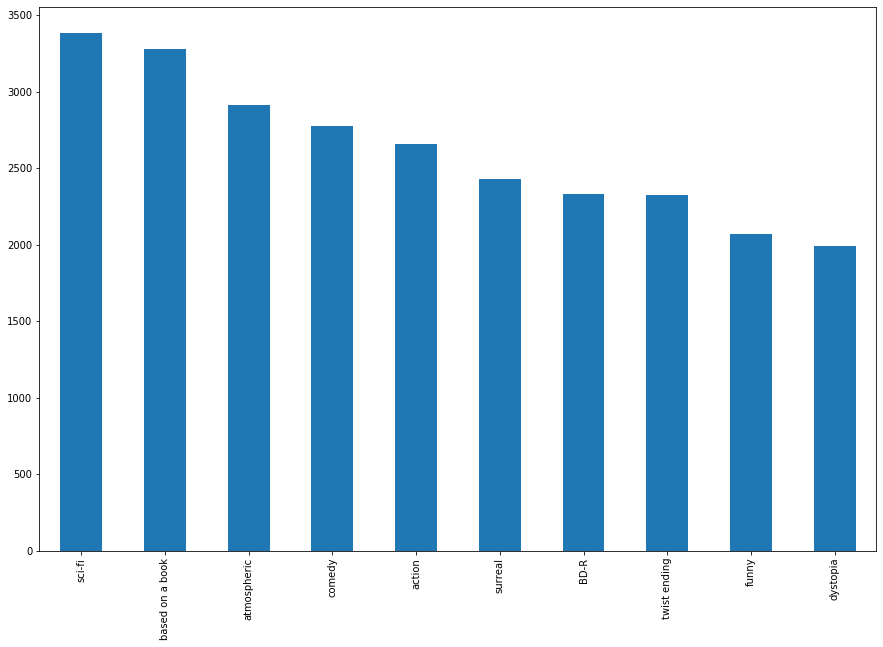

In [19]:
#plot top movie tags, discovered later than one movie can have the same tag multiple times so the number of tags isnt representative of the quantity of movies with that tag 
tag_counts[:10].plot(kind = 'bar', figsize = (15,10))

# we can see that there are a lot of movies based on books 

# Im going to merge the 3 data sets and delete unnecessary columns 

In [20]:
avgratings= Ratings.groupby('movieId', as_index = False).mean()  # grouping info on each movie and finding the average rating for each movie 
del avgratings['userId'] # dont need the user id 
avgratings.head()


,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [21]:
#Merging movies with thier rating 
Movieratings = Movies.merge(avgratings, on = 'movieId', how = 'inner')


Movieratings.head(10)

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592
5,6,Heat (1995),Action|Crime|Thriller,3.834930
6,7,Sabrina (1995),Comedy|Romance,3.366484
7,8,Tom and Huck (1995),Adventure|Children,3.142049
8,9,Sudden Death (1995),Action,3.004924
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.430029


In [22]:
#Checking how many movies are rated higher than 4 

is_highly_rated = Movieratings['rating'] >= 4
highly_rated= Movieratings[is_highly_rated]
print ('The number of movies rated an average score of 4 or more is ' + str(len(highly_rated))) 
highly_rated.sort_values('rating', ascending = False )

The number of movies rated an average score of 4 or more is 1757


,movieId,title,genres,rating
16952,86055,"Foster Brothers, The (Süt kardesler) (1976)",Comedy,5.0
23282,111546,Paying the Price: Killing the Children of Iraq...,Documentary,5.0
26331,129036,People of the Wind (1976),Documentary,5.0
20606,101292,Abendland (2011),Documentary,5.0
24570,117418,Victor and the Secret of Crocodile Mansion (2012),Adventure|Children|Mystery,5.0
23824,113860,"Codes of Gender, The (2010)",Documentary,5.0
24360,116227,Taxi Blues (1990),Drama,5.0
26421,129526,The Color of Milk (2004),Comedy|Drama,5.0
24821,118610,Rock the Boat (1944),Animation,5.0
9557,27914,"Hijacking Catastrophe: 9/11, Fear & the Sellin...",Documentary,5.0


#plot top rated movies and thier ratings
mtitle = highly_rated['title'].head(10)
mrating= highly_rated['rating'].head(10)
y_pos = np.arange(len(mtitle))

plt.figure(figsize = (10,5))
plt.ylim(4,5)
plt.bar(mtitle, mrating, alpha= 0.8, color ='g')

plt.xticks(y_pos, mtitle, rotation = 60)
plt.title('highly rated movies')
plt.xlabel('movie titiles')
plt.show()


In [23]:
Movieinfo = highly_rated.merge(Tags, on= 'movieId', how = 'inner').sort_values('rating', ascending = False) # it didnt let me do this before the rating filter bc of size i think 

Movieinfo.head(10)

,movieId,title,genres,rating,tag
71541,92783,Latin Music USA (2009),Documentary|Musical,5.0,jazz
73821,110419,Palestine Is Still the Issue (2003),Documentary,5.0,Israel
72993,106517,De la servitude moderne (2009),Documentary,5.0,Jean-François Brient
73034,107252,Island at War (2004),Drama|War,5.0,Peter Lydon
73035,107252,Island at War (2004),Drama|War,5.0,Thaddeus O'Sullivan
74296,120134,Doggiewoggiez! Poochiewoochiez! (2012),Comedy,5.0,Everything is Terrible
74295,120134,Doggiewoggiez! Poochiewoochiez! (2012),Comedy,5.0,strange
74294,120134,Doggiewoggiez! Poochiewoochiez! (2012),Comedy,5.0,mind-melting
74293,120134,Doggiewoggiez! Poochiewoochiez! (2012),Comedy,5.0,mind-bending
74292,120134,Doggiewoggiez! Poochiewoochiez! (2012),Comedy,5.0,hi Nic!


In [24]:
#tag_count2= Movieinfo['tag'].value_counts()
#tag_count2[:50]

In [25]:
BasedBook = Movieinfo['tag'].str.contains( 'book' )   #checks if books is in tags 
bookmovie = Movieinfo[BasedBook]
no_of_books = len(bookmovie.title.unique())
print (no_of_books)

94


In [26]:
#Whats the average rating of highly rated book  movies, and highly rated movies in general ?

#average rating of books in highly rated list 
avrating = bookmovie['rating'].mean()
print (avrating)


4.152882423777357


In [27]:
#what % of top movies is books?
percentage = float(round((no_of_books/len(highly_rated)) * 100, 2))
print ('the percentage of top movies based on books is ' + str(percentage) + '%' )

the percentage of top movies based on books is 5.35%


# this is lower than i expected lmaoo 


## next time i open: cross check and comment properly on codes. maybe books are more  popular in certain genres? check drama, romance, thrillers, animations, comedy. 

In [28]:
Movieinfo.head(10)

,movieId,title,genres,rating,tag
71541,92783,Latin Music USA (2009),Documentary|Musical,5.0,jazz
73821,110419,Palestine Is Still the Issue (2003),Documentary,5.0,Israel
72993,106517,De la servitude moderne (2009),Documentary,5.0,Jean-François Brient
73034,107252,Island at War (2004),Drama|War,5.0,Peter Lydon
73035,107252,Island at War (2004),Drama|War,5.0,Thaddeus O'Sullivan
74296,120134,Doggiewoggiez! Poochiewoochiez! (2012),Comedy,5.0,Everything is Terrible
74295,120134,Doggiewoggiez! Poochiewoochiez! (2012),Comedy,5.0,strange
74294,120134,Doggiewoggiez! Poochiewoochiez! (2012),Comedy,5.0,mind-melting
74293,120134,Doggiewoggiez! Poochiewoochiez! (2012),Comedy,5.0,mind-bending
74292,120134,Doggiewoggiez! Poochiewoochiez! (2012),Comedy,5.0,hi Nic!


In [29]:
Movieinfo['genres'].unique()

array(['Documentary|Musical', 'Documentary', 'Drama|War', 'Comedy',
       'Drama', 'Children|Fantasy', 'Comedy|Drama|Romance',
       'Comedy|Mystery', 'Drama|Romance', 'Action|Comedy',
       'Crime|Documentary', 'Crime|Thriller', '(no genres listed)',
       'Drama|Thriller|War', 'Comedy|Crime|Thriller',
       'Animation|Comedy|Romance', 'Drama|Film-Noir|Mystery|Romance',
       'Comedy|Drama|Thriller', 'Drama|Musical|Romance', 'Children|Drama',
       'Action|Crime|Drama|Thriller', 'Action|Drama', 'Drama|Western',
       'Documentary|Drama', 'Comedy|Drama', 'Documentary|Drama|Sci-Fi',
       'Action|Thriller', 'Comedy|Musical', 'Drama|Romance|War', 'Sci-Fi',
       'Crime|Drama', 'Adventure|Documentary', 'Comedy|Documentary',
       'Comedy|Romance', 'Action|Comedy|Thriller', 'Documentary|Horror',
       'Drama|Horror|Mystery|Romance|Thriller', 'Children|Drama|Thriller',
       'Animation|Comedy', 'Drama|Thriller',
       'Action|Adventure|Comedy|Fantasy',
       'Animation|Childr

In [41]:
horror= Movieinfo['genres'].str.contains('Horror' )
Horror = Movieinfo[horror]

no_of_horror_movies = len(Horror.title.unique())
print('There are ' + str(no_of_horror_movies) + ' horror movies')

horrorbooks= Horror['tag'].str.contains('book')
Horrorbooks = Horror[horrorbooks]

no_of_horrorbooks = len(Horrorbooks.title.unique())
print ('There are ' + str(no_of_horrorbooks) +  'horror movies based on books')

horrorpercentage = float(round((no_of_horrorbooks/no_of_horror_movies) * 100, 2))
print ('the percentage of top horror movies based on books is ' + str(horrorpercentage) + '%')

TypeError: unsupported operand type(s) for &: 'str' and 'int'

In [31]:
drama= Movieinfo['genres'].str.contains('Drama')
Drama = Movieinfo[drama]

no_of_drama_movies = len(Drama.title.unique())
print('There are ' + str(no_of_drama_movies) + ' top rated drama movies')
# print(Drama.title.unique()) < -- for cross checking results 


dramabooks= Drama['tag'].str.contains('book')
Dramabooks = Drama[dramabooks]

# print (Dramabooks.title.unique())

no_of_dramabooks = len(Dramabooks.title.unique())
print ('There are ' + str(no_of_dramabooks) +  ' drama movies based on books')

dramapercentage = float(round((no_of_dramabooks/no_of_drama_movies) * 100, 2))
print ('the percentage of top drama movies based on books is ' + str(dramapercentage) + '%')

There are 572 top rated drama movies
There are 65 drama movies based on books
the percentage of top drama movies based on books is 11.36%


In [32]:
romance= Movieinfo['genres'].str.contains('Romance')
Romance = Movieinfo[romance]

no_of_romance_movies = len(Romance.title.unique())
print('There are ' + str(no_of_romance_movies) + ' top rated romance movies')


romancebooks= Romance['tag'].str.contains('book')
Romancebooks = Romance[romancebooks]

no_of_romancebooks = len(Romancebooks.title.unique())
print ('There are ' + str(no_of_romancebooks) +  ' romance movies based on books')

romancepercentage = float(round((no_of_romancebooks/no_of_romance_movies) * 100, 2))
print ('the percentage of top romance movies based on books is ' + str(romancepercentage) + '%')

There are 143 top rated romance movies
There are 17 romance movies based on books
the percentage of top romance movies based on books is 11.89%


In [33]:
adventure= Movieinfo['genres'].str.contains('Adventure')
Adventure = Movieinfo[adventure]
                                           
no_of_adventure_movies = len(Adventure.title.unique())
print('There are ' + str(no_of_adventure_movies) + ' top rated adventure movies')


adventurebooks= Adventure['tag'].str.contains('book')
Adventurebooks = Adventure[adventurebooks]

no_of_adventurebooks = len(Adventurebooks.title.unique())
print ('There are ' + str(no_of_adventurebooks) +  ' adventure movies based on books')

adventurepercentage = float(round((no_of_adventurebooks/no_of_adventure_movies) * 100, 2))
print ('the percentage of top adventure movies based on books is ' + str(adventurepercentage) + '%')

There are 80 top rated adventure movies
There are 20 adventure movies based on books
the percentage of top adventure movies based on books is 25.0%


In [34]:
crime= Movieinfo['genres'].str.contains('Crime')
Crime = Movieinfo[crime]
                                           
no_of_crime_movies = len(Crime.title.unique())
print('There are ' + str(no_of_crime_movies) + ' top rated crime movies')


crimebooks= Crime['tag'].str.contains('book')
Crimebooks = Crime[crimebooks]

no_of_crimebooks = len(Crimebooks.title.unique())
print ('There are ' + str(no_of_crimebooks) +  ' crime movies based on books')

crimepercentage = float(round((no_of_crimebooks/no_of_crime_movies) * 100, 2))
print ('the percentage of top crime movies based on books is ' + str(crimepercentage) + '%')

There are 100 top rated crime movies
There are 20 crime movies based on books
the percentage of top crime movies based on books is 20.0%


In [35]:
action= Movieinfo['genres'].str.contains('Action')
Action = Movieinfo[action]
                                           
no_of_action_movies = len(Action.title.unique())
print('There are ' + str(no_of_action_movies) + ' top rated action movies')


actionbooks= Action['tag'].str.contains('book')
Actionbooks = Action[actionbooks]

no_of_actionbooks = len(Actionbooks.title.unique())
print ('There are ' + str(no_of_actionbooks) +  ' action movies based on books')

actionpercentage = float(round((no_of_actionbooks/no_of_action_movies) * 100, 2))
print ('the percentage of top action movies based on books is ' + str(actionpercentage) + '%')

There are 85 top rated action movies
There are 17 action movies based on books
the percentage of top action movies based on books is 20.0%


In [36]:
scify= Movieinfo['genres'].str.contains('Sci')
Scify = Movieinfo[scify]
                                           
no_of_scify_movies = len(Scify.title.unique())
print('There are ' + str(no_of_scify_movies) + ' top rated scify movies')


scifybooks= Scify['tag'].str.contains('book')
Scifybooks = Scify[scifybooks]

no_of_scifybooks = len(Scifybooks.title.unique())
print ('There are ' + str(no_of_scifybooks) +  ' Sci-fy movies based on books')

scifypercentage = float(round((no_of_scifybooks/no_of_scify_movies) * 100, 2))
print ('the percentage of top Sci-fy movies based on books is ' + str(scifypercentage) + '%')

There are 39 top rated scify movies
There are 6 Sci-fy movies based on books
the percentage of top Sci-fy movies based on books is 15.38%


In [37]:
comedy= Movieinfo['genres'].str.contains('Comedy')
Comedy = Movieinfo[comedy]
                                           
no_of_comedy_movies = len(Comedy.title.unique())
print('There are ' + str(no_of_comedy_movies) + ' top rated comedy movies')


comedybooks= Comedy['tag'].str.contains('book')
Comedybooks = Comedy[comedybooks]

no_of_comedybooks = len(Comedybooks.title.unique())
print ('There are ' + str(no_of_comedybooks) +  ' Comedy movies based on books')

comedypercentage = float(round((no_of_comedybooks/no_of_comedy_movies) * 100, 2))
print ('the percentage of top Comedy movies based on books is ' + str(comedypercentage) + '%')

There are 243 top rated comedy movies
There are 12 Comedy movies based on books
the percentage of top Comedy movies based on books is 4.94%


In [38]:
import seaborn as sns #apparently a joke bc i wanted to import as sb but just for continuity & to avoid confusion

In [39]:
data= [['Comedy', comedypercentage ], ['Action', actionpercentage], ['Drama', dramapercentage], ['Sci-fy', scifypercentage], 
      ['Horror', horrorpercentage], ['Adventure', adventurepercentage], ['Romance',romancepercentage]]
df = pd.DataFrame(data, columns = ['Genres', '% based on books'])
df

,Genres,% based on books
0,Comedy,4.94
1,Action,20.00
2,Drama,11.36
3,Sci-fy,15.38
4,Horror,17.86
5,Adventure,25.00
6,Romance,11.89


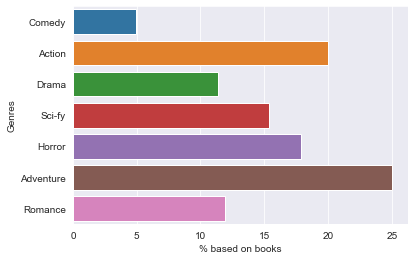

In [40]:
sns.set_style('darkgrid')
sns.barplot(x ='% based on books', y = 'Genres', data = df )